# UNO Card Game Simulator

This is the steering console where simulations of the UNO card game can be executed. There are two different Reinforcement Learning Models implemented, which can be selected together with their respective model parameters.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Win-Rate" data-toc-modified-id="Win-Rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Win Rate</a></span></li><li><span><a href="#Q-Values" data-toc-modified-id="Q-Values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Q-Values</a></span></li><li><span><a href="#Visits" data-toc-modified-id="Visits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visits</a></span></li><li><span><a href="#Possible-Moves" data-toc-modified-id="Possible-Moves-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Possible Moves</a></span></li></ul></li><li><span><a href="#Extraction" data-toc-modified-id="Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extraction</a></span></li></ul></div>

### Libraries
***

In [403]:
# Custom libraries
import environment as uno

# Public libraries
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [404]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [405]:
def color_lib(categories):
    """
    This function generates a dictionary that assigns a specific color from a color spectrum to each fund.
    It enables consistent coloring across visualizations.
    """
    
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

### Parameters
***

In [406]:
# Widgets for settings
widg_sim       = widgets.IntText(value = 10000, description = "Simulations:")
widg_algo      = widgets.Dropdown(options=["monte-carlo","q-learning"], value="monte-carlo", description="Algorithm:")
widg_new_model = widgets.Dropdown(options=[True,False], value=True, description="New Model:")
widg_comment   = widgets.Dropdown(options=[True,False], value=False, description="Show Game:")

# Widgets for parameters
widg_epsilon = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description="Epsilson:", readout_format=".2f")
widg_step    = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description="Step Size:", readout_format=".2f")

underline ("General Settings:")
display(widg_sim)
display(widg_algo)
display(widg_new_model)
display(widg_comment)

underline ("\nModel Parameters:")
display(widg_epsilon)
display(widg_step)

IntText(value=10000, description='Simulations:')

Dropdown(description='Algorithm:', options=('monte-carlo', 'q-learning'), value='monte-carlo')

Dropdown(description='New Model:', options=(True, False), value=True)

Dropdown(description='Show Game:', index=1, options=(True, False), value=False)

FloatSlider(value=0.3, description='Epsilson:', max=1.0, step=0.01)

FloatSlider(value=0.3, description='Step Size:', max=1.0, step=0.01)

### Run
***

In [407]:
winners, turns, coverage = list(), list(), list()

In [408]:
# Agent parameters
agent_info = {"epsilon"  : widg_epsilon.value, 
              "step_size": widg_step.value, 
              "new_model": widg_new_model.value}


# Run simulations
run = uno.tournament(iterations = widg_sim.value,
                     algo       = widg_algo.value,
                     comment    = widg_comment.value,
                     agent_info = agent_info)


winners.extend(run[0])
turns.extend(run[1])
coverage.extend(run[2])

  0%|          | 0/10000 [00:00<?, ?it/s]

### Analysis
***

#### Win Rate

In [409]:
winners.count("AI")/len(winners)

0.5086

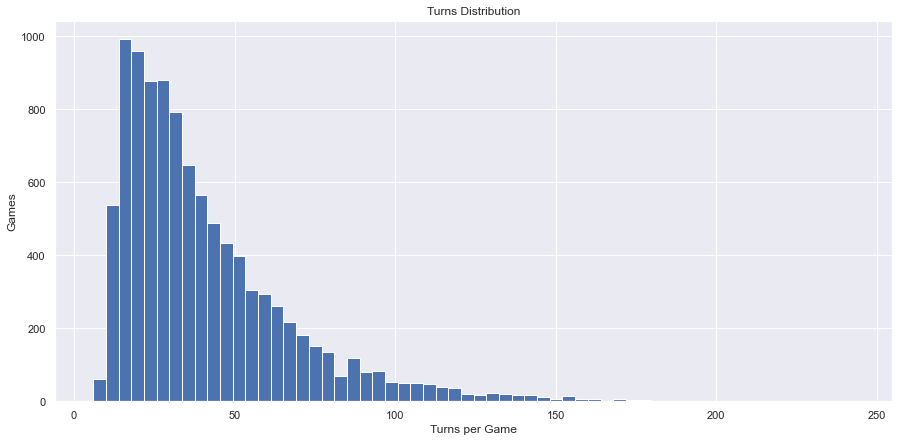

In [410]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(turns, bins =60, edgecolor = "w")
plt.title("Turns Distribution")
plt.xlabel("Turns per Game")
plt.ylabel("Games")

plt.show()

In [411]:
result = pd.concat([pd.Series(winners), pd.Series(turns)], axis = 1)
result = result.rename(columns={0:"Winner",1:"Turns"})

result["Win_rate"] = result["Winner"].apply(lambda x: 1 if x == "AI" else 0)
result["Win_rate"] = result["Win_rate"].cumsum()/(result.index+1)

print(result.head(25))
result.tail(25)

,Winner,Turns,Win_rate
9975,AI,70,0.509122
9976,Random,48,0.509071
9977,Random,99,0.509020
9978,Random,82,0.508969
9979,AI,30,0.509018
9980,Random,14,0.508967
9981,AI,148,0.509016
9982,Random,62,0.508965
9983,AI,36,0.509014
9984,AI,19,0.509064


In [412]:
result["Winner"][-10000:].value_counts()

AI        5086
Random    4914
Name: Winner, dtype: int64

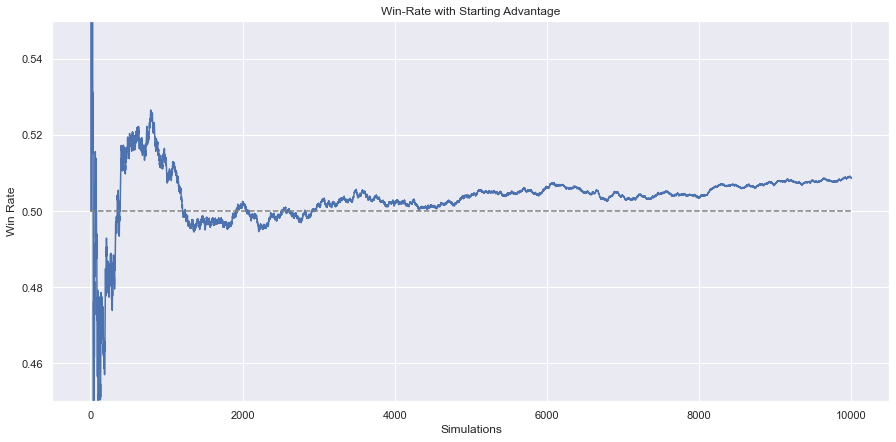

In [413]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(result.index, result["Win_rate"])
plt.hlines(0.5, 0, len(winners), colors="grey", linestyles="dashed")

# Formatting
plt.title("Win-Rate with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.ylim((0.45,0.55))

plt.show()

#### Q-Values

In [414]:
q_table = pd.DataFrame(uno.agent.q)
q_table["IDX"] = q_table.index
q_table = q_table.set_index("IDX", drop = True)
q_table.index.name = None

In [415]:
q_table.head()

,RED,GRE,BLU,YEL,SKI,REV,PL2,PL4,COL
"(RED, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
"(RED, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7599
"(RED, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0000
"(RED, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
"(RED, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


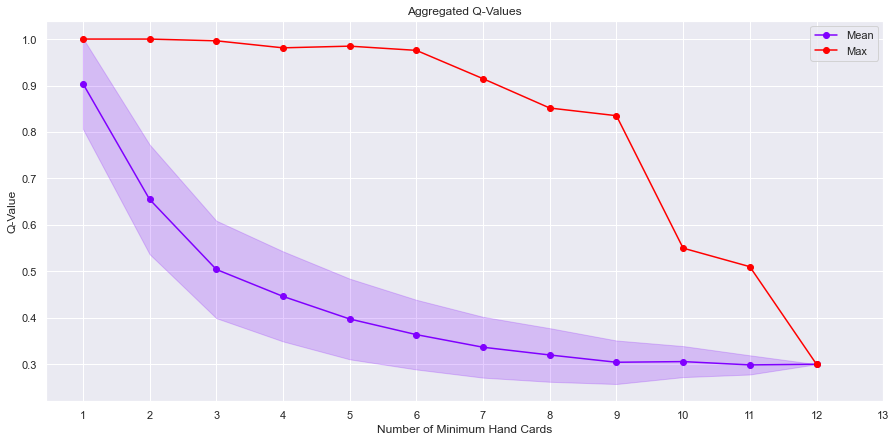

In [416]:
q_curve = q_table.copy()

# Data prep
q_curve["HAND"] = q_curve.index.map(lambda x: sum(x[1:10]))
q_curve["MAX"]  = q_curve[["RED","GRE","BLU","YEL","SKI","REV","PL2","PL4","COL"]].max(axis = 1)
q_curve = q_curve [["HAND","MAX"]].replace(0, np.NaN)


# Aggregation
q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.groupby("HAND").std()["MAX"])/2


# Plot
fig = plt.figure(1, figsize=(15,7))
colors = color_lib(["Mean","Max"])

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o", c = colors["Mean"])
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o", c = colors["Max"])
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, color = colors["Mean"], alpha=0.2)


# Formatting
plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

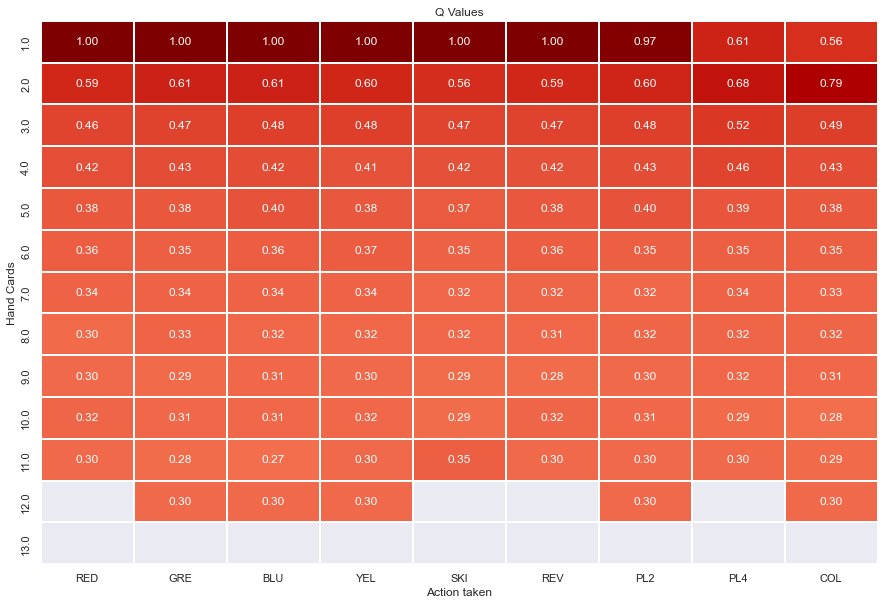

In [417]:
q_pivot = q_table.copy()

# Data prep
q_pivot["HAND"] = q_pivot.index.map(lambda x: sum(x[1:10]))
q_pivot = q_pivot.replace(0, np.NaN)
q_pivot = q_pivot.groupby("HAND").mean()


# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(q_pivot, 
            fmt=".2f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Q Values")
ax.set(xlabel="Action taken", ylabel="Hand Cards")
plt.show()

#### Visits

In [418]:
q_visited = (q_table != 0).values.sum()
q_possible = 0

for i in range(len(q_table)):
    q_possible += sum(q_table.index[i][8:])
    
print (f'From {q_possible:,} possible combinations {q_visited:,} or {q_visited/q_possible*100:.2f}% have been visited')

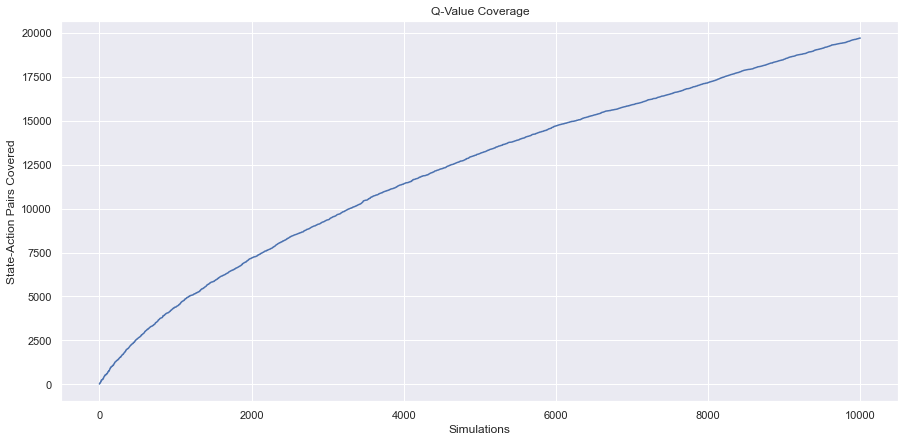

In [419]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(pd.Series(coverage))

plt.xlabel("Simulations")
plt.ylabel("State-Action Pairs Covered")
plt.title("Q-Value Coverage")
plt.show()

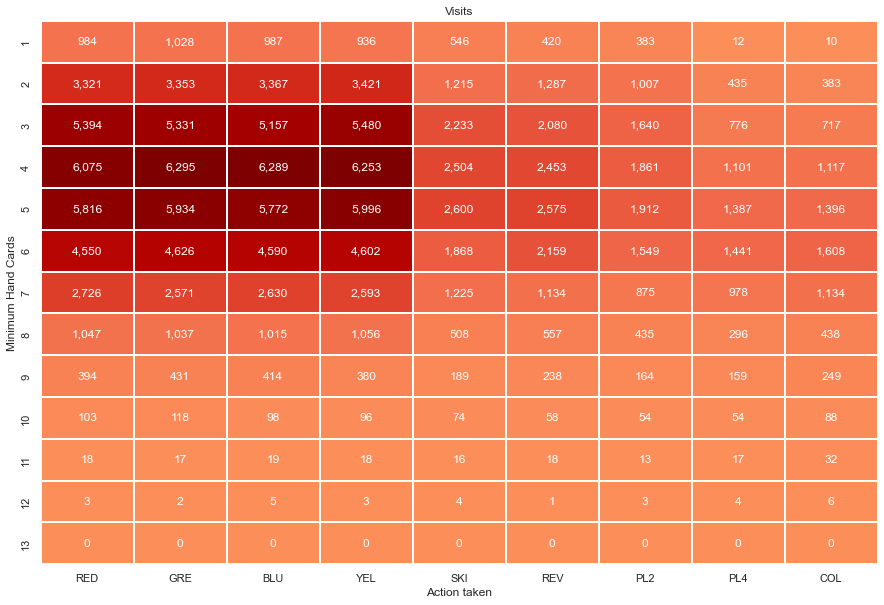

In [420]:
visit = uno.agent.visit.copy()

# Data prep
visit["HAND"] = visit.index.map(lambda x: sum(x[1:10]))
visit = visit.replace(0, np.NaN)
visit = visit.groupby("HAND").sum()
visit.index = visit.index.astype(int)


# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(visit, 
            fmt= ",.0f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Visits")
ax.set(xlabel="Action taken", ylabel="Minimum Hand Cards")
plt.show()

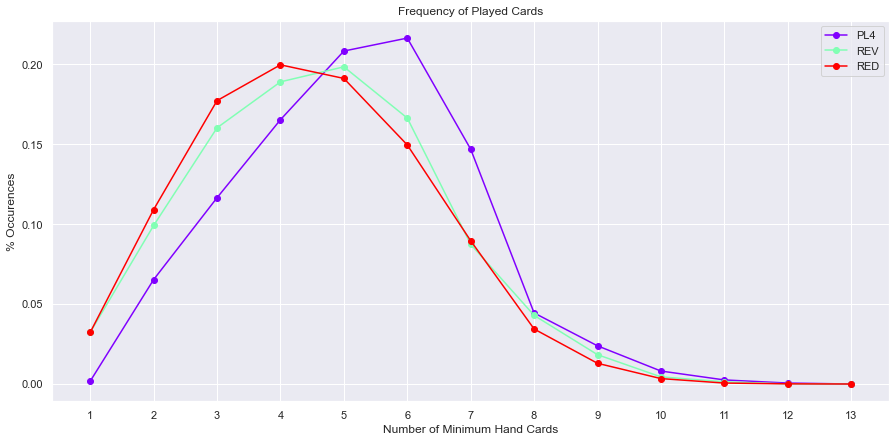

In [421]:
card_type = ["PL4","REV","RED"]
colors = color_lib(card_type)

# Plotting
fig = plt.figure(1, figsize=(15,7))

for i in card_type:
    temp = visit[i]/sum(visit[i])
    plt.plot(temp.index, temp, label=i, marker = "o", c = colors[i])


# Formatting
plt.xticks(temp.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("% Occurences")
plt.title("Frequency of Played Cards")
plt.legend()
plt.show()

#### Possible Moves

In [422]:
actions = q_table.columns.to_list()

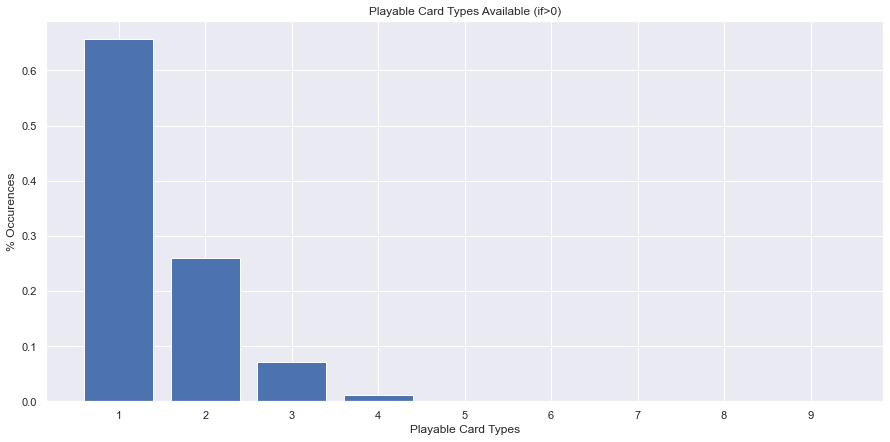

In [423]:
q_check = uno.agent.visit.copy()

# Data prep
q_check["STATE"] = q_check.index
q_check["H_PLAY"]  = q_check["STATE"].apply(lambda x: sum(x[8:]))
q_check = q_check.reset_index(drop = True)

# Plotting
fig = plt.figure(1, figsize=(15,7))

possib = q_check.groupby("H_PLAY").sum()
possib = possib[actions].sum(axis=1)
possib = possib/possib.sum()
possib = possib[1:]

plt.bar(possib.index, possib.values)

# Formatting
plt.xticks(possib.index)
plt.xlabel("Playable Card Types")
plt.ylabel("% Occurences")
plt.title("Playable Card Types Available (if>0)")
plt.show()

### Extraction
***

In [424]:
# Model files
q_table.to_csv        ("../assets/files/"+widg_algo.value+"-q.csv", sep = ";")
uno.agent.visit.to_csv("../assets/files/"+widg_algo.value+"-visits.csv", sep = ";")

# Log files
pd.Series(coverage).to_csv("../assets/files/"+widg_algo.value+"-coverage.csv", sep = ";")
result.to_csv             ("../assets/files/"+widg_algo.value+"-result.csv", sep = ";")